<a href="https://colab.research.google.com/github/gaudhami4/PANDAS-ASSIGNMENT/blob/main/COURIER_SHIPPING_CHARGE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   **ECOMMERCE COURIER SERVICE ANALYSIS**

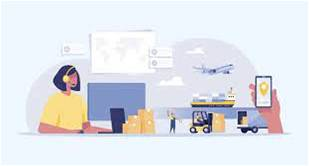

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**LOAD DATASET**

In [ ]:
df1_PIN_X = pd.read_excel(r'/content/Company X - Pincode Zones.xlsx')
df2_ORDER_X = pd.read_excel(r'/content/Company X - Order Report.xlsx')
df3_SKU_X= pd.read_excel(r'/content/Company X - SKU Master.xlsx')
df4_INVOICE_COU= pd.read_excel(r'/content/Courier Company - Invoice.xlsx')
df5_RATES_COU = pd.read_excel(r'/content/Courier Company - Rates.xlsx')

In [ ]:
df1_PIN_X.rename(columns={'Zone':'Delivery zone as per ABC'},inplace=True)
df1_PIN_X.drop_duplicates()
df1_PIN_X.head()

,Warehouse Pincode,Customer Pincode,Delivery zone as per ABC
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [ ]:
#print(df2_ORDER_X)
df2_ORDER_X

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0
...,...,...,...
395,2001806229,8904223818942,1.0
396,2001806229,8904223818850,1.0
397,2001806226,8904223818850,2.0
398,2001806210,8904223816214,1.0


In [ ]:
df2_ORDER_X.rename(columns={'ExternOrderNo':'Order ID'},inplace=True)

In [ ]:
df3_SKU_X

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120
...,...,...
61,8904223819505,210
62,8904223819499,210
63,8904223819512,210
64,8904223819543,300


In [ ]:
df4_INVOICE_COU

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4
...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0


In [ ]:
df4_INVOICE_COU.rename(columns={'Zone':'Delivery zone as per Courier','Charged Weight':'Total weight as per courier'},inplace=True)

In [ ]:
df4_INVOICE_COU

,AWB Code,Order ID,Total weight as per courier,Warehouse Pincode,Customer Pincode,Delivery zone as per Courier,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4
...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0


In [ ]:
df_courier_rates = pd.read_excel(r'/content/Courier Company - Rates.xlsx')
df_courier_rates

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


# **EDA**

In [ ]:
df1_PIN_X.info()
df1_PIN_X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Warehouse Pincode         124 non-null    int64 
 1   Customer Pincode          124 non-null    int64 
 2   Delivery zone as per ABC  124 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


,Warehouse Pincode,Customer Pincode,Delivery zone as per ABC
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [ ]:
df2_ORDER_X.info()
df2_ORDER_X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Order ID   400 non-null    int64  
 1   SKU        400 non-null    object 
 2   Order Qty  400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


,Order ID,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [ ]:
df3_SKU_X.info()
df3_SKU_X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         66 non-null     object
 1   Weight (g)  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [ ]:
df4_INVOICE_COU.info()
df4_INVOICE_COU.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AWB Code                      124 non-null    int64  
 1   Order ID                      124 non-null    int64  
 2   Total weight as per courier   124 non-null    float64
 3   Warehouse Pincode             124 non-null    int64  
 4   Customer Pincode              124 non-null    int64  
 5   Delivery zone as per Courier  124 non-null    object 
 6   Type of Shipment              124 non-null    object 
 7   Billing Amount (Rs.)          124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


,AWB Code,Order ID,Total weight as per courier,Warehouse Pincode,Customer Pincode,Delivery zone as per Courier,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [ ]:
df_courier_rates.info()
df_courier_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fwd_a_fixed       1 non-null      float64
 1   fwd_a_additional  1 non-null      float64
 2   fwd_b_fixed       1 non-null      int64  
 3   fwd_b_additional  1 non-null      float64
 4   fwd_c_fixed       1 non-null      float64
 5   fwd_c_additional  1 non-null      float64
 6   fwd_d_fixed       1 non-null      float64
 7   fwd_d_additional  1 non-null      float64
 8   fwd_e_fixed       1 non-null      float64
 9   fwd_e_additional  1 non-null      float64
 10  rto_a_fixed       1 non-null      float64
 11  rto_a_additional  1 non-null      float64
 12  rto_b_fixed       1 non-null      float64
 13  rto_b_additional  1 non-null      float64
 14  rto_c_fixed       1 non-null      float64
 15  rto_c_additional  1 non-null      float64
 16  rto_d_fixed       1 non-null      float64
 17  r

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [ ]:
df_INVOICE_X1=pd.merge(df2_ORDER_X,df3_SKU_X,how='left',on='SKU')
#df_INVOICE_X1.rename(columns={'ExternOrderNo':'Order ID'},inplace=True)
df_INVOICE_X1.dropna()

,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350
...,...,...,...,...
396,2001806229,8904223818942,1.0,133
397,2001806229,8904223818850,1.0,240
398,2001806226,8904223818850,2.0,240
399,2001806210,8904223816214,1.0,120


In [ ]:
df4_invoice_cou=df4_INVOICE_COU[['Order ID','Customer Pincode','Type of Shipment']]
df1_PIN_X1 =df1_PIN_X.drop_duplicates(subset=['Customer Pincode'])
df_INVOICE_COU_1=pd.merge(df1_PIN_X1,df4_invoice_cou,on='Customer Pincode')
df_INVOICE_COU_1.head()

,Warehouse Pincode,Customer Pincode,Delivery zone as per ABC,Order ID,Type of Shipment
0,121003,507101,d,2001806232,Forward charges
1,121003,486886,d,2001806273,Forward charges
2,121003,532484,d,2001806408,Forward charges
3,121003,143001,b,2001806458,Forward charges
4,121003,515591,d,2001807012,Forward charges


In [ ]:
DF=df_INVOICE_X1.merge(df_INVOICE_COU_1,on='Order ID')
DF.head()

,Order ID,SKU,Order Qty,Weight (g),Warehouse Pincode,Customer Pincode,Delivery zone as per ABC,Type of Shipment
0,2001827036,8904223818706,1.0,127,121003,173213,e,Forward charges
1,2001827036,8904223819093,1.0,150,121003,173213,e,Forward charges
2,2001827036,8904223819109,1.0,100,121003,173213,e,Forward charges
3,2001827036,8904223818430,1.0,165,121003,173213,e,Forward charges
4,2001827036,8904223819277,1.0,350,121003,173213,e,Forward charges


In [ ]:
DF['Type of Shipment'].value_counts()

Forward charges            351
Forward and RTO charges     50
Name: Type of Shipment, dtype: int64

In [ ]:
DF.merge(df_INVOICE_X1,on='Order ID')
DF

,Order ID,SKU,Order Qty,Weight (g),Warehouse Pincode,Customer Pincode,Delivery zone as per ABC,Type of Shipment
0,2001827036,8904223818706,1.0,127,121003,173213,e,Forward charges
1,2001827036,8904223819093,1.0,150,121003,173213,e,Forward charges
2,2001827036,8904223819109,1.0,100,121003,173213,e,Forward charges
3,2001827036,8904223818430,1.0,165,121003,173213,e,Forward charges
4,2001827036,8904223819277,1.0,350,121003,173213,e,Forward charges
...,...,...,...,...,...,...,...,...
396,2001806229,8904223818942,1.0,133,121003,421204,d,Forward charges
397,2001806229,8904223818850,1.0,240,121003,421204,d,Forward charges
398,2001806226,8904223818850,2.0,240,121003,723146,d,Forward charges
399,2001806210,8904223816214,1.0,120,121003,140604,b,Forward charges


In [ ]:
DF.rename(columns={'Order Qty':'Order_Qty','Weight (g)':'Weight_g','Zone':'Delivery zone as per courier'},inplace=True)
DF.head()

,Order ID,SKU,Order_Qty,Weight_g,Warehouse Pincode,Customer Pincode,Delivery zone as per ABC,Type of Shipment
0,2001827036,8904223818706,1.0,127,121003,173213,e,Forward charges
1,2001827036,8904223819093,1.0,150,121003,173213,e,Forward charges
2,2001827036,8904223819109,1.0,100,121003,173213,e,Forward charges
3,2001827036,8904223818430,1.0,165,121003,173213,e,Forward charges
4,2001827036,8904223819277,1.0,350,121003,173213,e,Forward charges


**CONVERTING GRAMS TO KILOGRAMS**

 **ASSIGNING WEIGHT SLABS** 

In [ ]:
kg=1000
convert_g_to_kg="""
Total_Weight_Per_ABC=(Order_Qty*Weight_g)/@kg
 """
DF.eval(convert_g_to_kg,inplace=True,engine='python')

#DF.drop(['Total_Weight_Per_Shipment'],axis=1) 
def weight_slab(weight):
    i=round(weight%1,1)
    if i==0.0:
        return weight
    elif i>0.5:
        return int(weight)+1.0
    else:
        return int(weight)+0.5


In [ ]:
DF['Weight Slab As Per ABC (KG)']=DF['Total_Weight_Per_ABC'].apply(weight_slab)

In [ ]:
DF.head(3)

,Order ID,SKU,Order_Qty,Weight_g,Warehouse Pincode,Customer Pincode,Delivery zone as per ABC,Type of Shipment,Total_Weight_Per_ABC,Weight Slab As Per ABC (KG)
0,2001827036,8904223818706,1.0,127,121003,173213,e,Forward charges,0.127,0.5
1,2001827036,8904223819093,1.0,150,121003,173213,e,Forward charges,0.150,0.5
2,2001827036,8904223819109,1.0,100,121003,173213,e,Forward charges,0.100,0.5


In [ ]:
DF['Weight Slab As Per ABC (KG)'].value_counts()

0.50    384
1.00     12
0.01      3
0.03      1
1.50      1
Name: Weight Slab As Per ABC (KG), dtype: int64

In [ ]:
df4_INVOICE_COU['Weight Slab As Per Courier (KG)']=df4_INVOICE_COU['Total weight as per courier'].apply(weight_slab)


In [ ]:
df4_INVOICE_COU.head()

,AWB Code,Order ID,Total weight as per courier,Warehouse Pincode,Customer Pincode,Delivery zone as per Courier,Type of Shipment,Billing Amount (Rs.),Weight Slab As Per Courier (KG)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.5
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,1.0
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.5
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,1.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.5


**CALCULATING COURIER CHARGES AT WEIGHT SLAB AND PINCODE LEVEL**

In [ ]:
total_Expected_charge=[]
for i in range(len(DF)):
    fwd_category='fwd_'+DF['Delivery zone as per ABC'][i]
    fwd_fixed=df_courier_rates[fwd_category+'_fixed'][0]
    fwd_additional=df_courier_rates[fwd_category+'_additional'][0]
    rto_category='rto_'+DF['Delivery zone as per ABC'][i]
    rto_fixed=df_courier_rates[rto_category+'_fixed'][0]
    rto_additional=df_courier_rates[rto_category+'_additional'][0]
    if DF['Type of Shipment'][i]=='Forward charges':
        if DF['Weight Slab As Per ABC (KG)'][i]<=0.5:
            total_Expected_charge.append(fwd_fixed)
        else:
            additional_weight=(DF['Weight Slab As Per ABC (KG)'][i]-0.5)/0.5
            total_Expected_charge.append(fwd_fixed+additional_weight*fwd_additional)
    if DF['Type of Shipment'][i]=='Forward and RTO charges':
        if DF['Weight Slab As Per ABC (KG)'][i]<=0.5:
            total_Expected_charge.append(fwd_fixed+rto_fixed)
        else:
            additional_weight=(DF['Weight Slab As Per ABC (KG)'][i]-0.5)/0.5
            total_Expected_charge.append(fwd_fixed+additional_weight*(fwd_additional+rto_additional))

DF['Expected Charge As Per ABC (Rs.)']=total_Expected_charge

In [ ]:
df4_INVOICE_COU.columns

Index(['AWB Code', 'Order ID', 'Total weight as per courier',
       'Warehouse Pincode', 'Customer Pincode', 'Delivery zone as per Courier',
       'Type of Shipment', 'Billing Amount (Rs.)',
       'Weight Slab As Per Courier (KG)'],
      dtype='object')

In [ ]:
df4_INVOICE_COU.rename(columns={'Total weight as per courier':'Total Weight As Per Courier Company (KG)','Delivery zone as per Courier':'Delivery Zone Charged By Courier Company','Weight Slab As Per Courier (KG)':'Weight Slab Charged By Courier Company (KG)'},inplace=True)

In [ ]:
Output1=df4_INVOICE_COU[['AWB Code', 'Order ID','Total Weight As Per Courier Company (KG)',
        'Delivery Zone Charged By Courier Company','Billing Amount (Rs.)', 'Weight Slab Charged By Courier Company (KG)']]

In [ ]:
DF.columns

Index(['Order ID', 'SKU', 'Order_Qty', 'Weight_g', 'Warehouse Pincode',
       'Customer Pincode', 'Delivery zone as per ABC', 'Type of Shipment',
       'Total_Weight_Per_ABC', 'Weight Slab As Per ABC (KG)',
       'Expected Charge As Per ABC (Rs.)'],
      dtype='object')

In [ ]:
DF.rename(columns={'Delivery zone as per ABC':'Delivery Zone As Per ABC','Total_Weight_Per_ABC':'Total Weight AS Per ABC (KG)'},inplace=True)

In [ ]:
Output2=DF[['Order ID',
       'Type of Shipment', 'Delivery Zone As Per ABC',
       'Total Weight AS Per ABC (KG)', 'Weight Slab As Per ABC (KG)',
       'Expected Charge As Per ABC (Rs.)']]

In [ ]:
OUTPUT=Output2.merge(Output1,on='Order ID',how='left')
OUTPUT.rename(columns={'AWB Code':'AWB Number','Billing Amount (Rs.)':'Charges_Billed_By_Courier_Company_Rs','Expected Charge As Per ABC (Rs.)':'Expected_Charge_As_Per_ABC_Rs'},inplace=True)


**DIFFERENCE BETWEEN EXPECTED CHARGE AND BILLED CHARGE**

In [ ]:
DIFF="""
Difference_Between_Expected_Charges_and_Billed_Charges_Rs =(Expected_Charge_As_Per_ABC_Rs - Charges_Billed_By_Courier_Company_Rs)
"""
OUTPUT.eval(DIFF,inplace=True,engine='python')

In [ ]:
OUTPUT[['Order ID','AWB Number','Total Weight AS Per ABC (KG)','Weight Slab As Per ABC (KG)','Total Weight As Per Courier Company (KG)','Weight Slab Charged By Courier Company (KG)','Delivery Zone As Per ABC','Delivery Zone Charged By Courier Company','Expected_Charge_As_Per_ABC_Rs','Charges_Billed_By_Courier_Company_Rs','Difference_Between_Expected_Charges_and_Billed_Charges_Rs']]

,Order ID,AWB Number,Total Weight AS Per ABC (KG),Weight Slab As Per ABC (KG),Total Weight As Per Courier Company (KG),Weight Slab Charged By Courier Company (KG),Delivery Zone As Per ABC,Delivery Zone Charged By Courier Company,Expected_Charge_As_Per_ABC_Rs,Charges_Billed_By_Courier_Company_Rs,Difference_Between_Expected_Charges_and_Billed_Charges_Rs
0,2001827036,1091122418320,0.127,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
1,2001827036,1091122418320,0.150,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
2,2001827036,1091122418320,0.100,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
3,2001827036,1091122418320,0.165,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
4,2001827036,1091122418320,0.350,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
...,...,...,...,...,...,...,...,...,...,...,...
396,2001806229,1091117222080,0.133,0.5,0.71,1.0,d,d,45.4,90.2,-44.8
397,2001806229,1091117222080,0.240,0.5,0.71,1.0,d,d,45.4,90.2,-44.8
398,2001806226,1091117222065,0.480,0.5,0.68,1.0,d,d,45.4,90.2,-44.8
399,2001806210,1091117221940,0.120,0.5,2.92,3.0,b,b,33.0,174.5,-141.5


**COMPUTING CORRECT,OVER,UNDER CHARGE ORDERS** 

In [ ]:
correctly_charged=OUTPUT[OUTPUT['Difference_Between_Expected_Charges_and_Billed_Charges_Rs']==0.0]
correctly=["Total Orders where ABC has been correctly charged",len(correctly_charged),sum(correctly_charged['Charges_Billed_By_Courier_Company_Rs'])]

over_charged=OUTPUT[OUTPUT['Difference_Between_Expected_Charges_and_Billed_Charges_Rs']<0.0]
over=["Total Orders where ABC has been over charged",len(over_charged),np.absolute(sum(over_charged['Difference_Between_Expected_Charges_and_Billed_Charges_Rs']))]

under_charged=OUTPUT[OUTPUT['Difference_Between_Expected_Charges_and_Billed_Charges_Rs']>0.0]
under=["Total Orders where ABC has been under charged",len(under_charged),np.absolute(sum(under_charged['Difference_Between_Expected_Charges_and_Billed_Charges_Rs']))]

In [ ]:
OUTPUT2=pd.DataFrame([correctly,over,under],columns=['Description','Count','Amount (Rs.)'])
OUTPUT2

,Description,Count,Amount (Rs.)
0,Total Orders where ABC has been correctly charged,12,507.6
1,Total Orders where ABC has been over charged,380,31737.5
2,Total Orders where ABC has been under charged,9,165.2


**# OUTPUT FILES**

In [ ]:
writer = pd.ExcelWriter('Expected_Result.xlsx',if_sheet_exists="replace",engine='openpyxl',mode="a")

# **Output Data 1**

In [ ]:
OUTPUT[['Order ID','AWB Number','Total Weight AS Per ABC (KG)','Weight Slab As Per ABC (KG)','Total Weight As Per Courier Company (KG)','Weight Slab Charged By Courier Company (KG)','Delivery Zone As Per ABC','Delivery Zone Charged By Courier Company','Expected_Charge_As_Per_ABC_Rs','Charges_Billed_By_Courier_Company_Rs','Difference_Between_Expected_Charges_and_Billed_Charges_Rs']]

,Order ID,AWB Number,Total Weight AS Per ABC (KG),Weight Slab As Per ABC (KG),Total Weight As Per Courier Company (KG),Weight Slab Charged By Courier Company (KG),Delivery Zone As Per ABC,Delivery Zone Charged By Courier Company,Expected_Charge_As_Per_ABC_Rs,Charges_Billed_By_Courier_Company_Rs,Difference_Between_Expected_Charges_and_Billed_Charges_Rs
0,2001827036,1091122418320,0.127,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
1,2001827036,1091122418320,0.150,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
2,2001827036,1091122418320,0.100,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
3,2001827036,1091122418320,0.165,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
4,2001827036,1091122418320,0.350,0.5,1.60,2.0,e,b,56.6,117.9,-61.3
...,...,...,...,...,...,...,...,...,...,...,...
396,2001806229,1091117222080,0.133,0.5,0.71,1.0,d,d,45.4,90.2,-44.8
397,2001806229,1091117222080,0.240,0.5,0.71,1.0,d,d,45.4,90.2,-44.8
398,2001806226,1091117222065,0.480,0.5,0.68,1.0,d,d,45.4,90.2,-44.8
399,2001806210,1091117221940,0.120,0.5,2.92,3.0,b,b,33.0,174.5,-141.5


In [ ]:
OUTPUT.to_excel(writer,sheet_name='Calculations')
calculations=writer.save()

In [ ]:
ALL = pd.read_excel('Expected_Result.xlsx', sheet_name=['Calculations', 'Summary'])
ALL['Calculations']

,Unnamed: 0,Order ID,Type of Shipment,Delivery Zone As Per ABC,Total Weight AS Per ABC (KG),Weight Slab As Per ABC (KG),Expected_Charge_As_Per_ABC_Rs,AWB Number,Total Weight As Per Courier Company (KG),Delivery Zone Charged By Courier Company,Charges_Billed_By_Courier_Company_Rs,Weight Slab Charged By Courier Company (KG),Difference_Between_Expected_Charges_and_Billed_Charges_Rs
0,0,2001827036,Forward charges,e,0.127,0.5,56.6,1091122418320,1.60,b,117.9,2.0,-61.3
1,1,2001827036,Forward charges,e,0.150,0.5,56.6,1091122418320,1.60,b,117.9,2.0,-61.3
2,2,2001827036,Forward charges,e,0.100,0.5,56.6,1091122418320,1.60,b,117.9,2.0,-61.3
3,3,2001827036,Forward charges,e,0.165,0.5,56.6,1091122418320,1.60,b,117.9,2.0,-61.3
4,4,2001827036,Forward charges,e,0.350,0.5,56.6,1091122418320,1.60,b,117.9,2.0,-61.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396,2001806229,Forward charges,d,0.133,0.5,45.4,1091117222080,0.71,d,90.2,1.0,-44.8
397,397,2001806229,Forward charges,d,0.240,0.5,45.4,1091117222080,0.71,d,90.2,1.0,-44.8
398,398,2001806226,Forward charges,d,0.480,0.5,45.4,1091117222065,0.68,d,90.2,1.0,-44.8
399,399,2001806210,Forward charges,b,0.120,0.5,33.0,1091117221940,2.92,b,174.5,3.0,-141.5


# **Output Data 2**

In [ ]:
OUTPUT2.to_excel(writer,sheet_name='Summary')
writer.save()

In [ ]:
ALL['Summary']

,Unnamed: 0,Description,Count,Amount (Rs.)
0,0,Total Orders where ABC has been correctly charged,12,507.6
1,1,Total Orders where ABC has been over charged,380,31737.5
2,2,Total Orders where ABC has been under charged,9,165.2
